In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

import sys
import matplotlib.pyplot as plt
import sklearn.decomposition as decomp
import sklearn.linear_model as linear_model
import sklearn.datasets as sk_data
from sklearn.preprocessing import StandardScaler
import numpy.linalg as nla
import sklearn.svm as svm
import pandas as pd
from scipy.io import loadmat
from pymatreader import read_mat
#import test-train split
from sklearn.model_selection import train_test_split
#import Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
H=pd.read_csv('/Users/inria/Desktop/M/TwinHouse.csv',sep=';',header=None)
W=pd.read_csv('/Users/inria/Desktop/M/TwinWeather.csv',sep=';',header=None)

In [3]:
# Inputs
Ti = H[7];    # temperature in living room at 187 cm (output)
Ti1=H[6];      # temperature in living room at 125 cm
Ti2=H[5];     #temperature in living room at 67cm
Tk = H[11];   # kitchen
Td = H[12];   # doorway
Tc = H[8];    # corridor
Tb2 = H[10];  # Children room
Tb1=H[13];    #Bed room
Ta = H[3];    # attic
Tg = H[4];    # cellar
Tv = H[29];   # ventilation supply air 
To = W[2];    # outdoor
Qn = W[5];    # Solar radiations from north
Qs = W[7];    # specific global solar vert. South
Qw = W[8];    # specific global solar vert. West
Qi = H[20];   # el. power living
Qk=H[23]+H[24]; #Kithcne power input minus duct losses
Qd=H[25]; #Doorway Heater
QB=H[26]; #Bedroom Heater

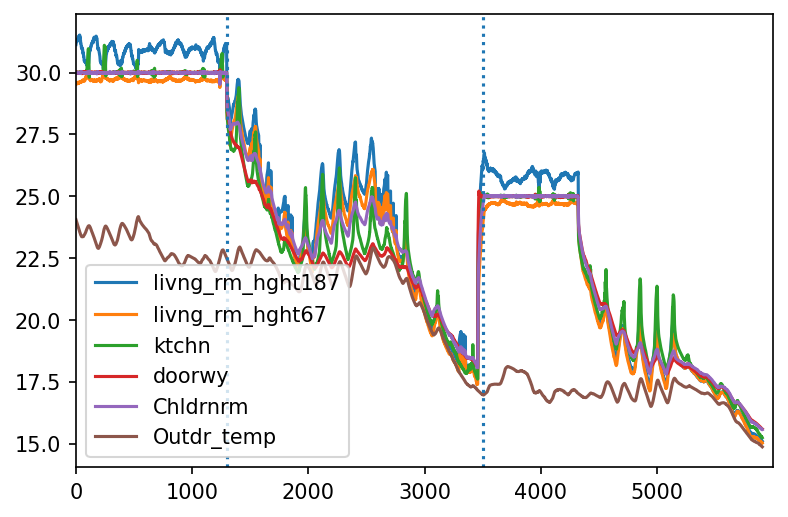

In [4]:
plt.figure(dpi=150)
plt.plot(Ti,label='livng_rm_hght187')
plt.plot(Ti2,label='livng_rm_hght67')
plt.plot(Tk,label='ktchn')
plt.plot(Td,label='doorwy')
plt.plot(Tb2,label='Chldrnrm')
plt.plot(Ta,label='Outdr_temp')
plt.axvline(x=1300,linestyle=':')
plt.axvline(x=3500,linestyle=':')
plt.xlim(0,6000)
plt.xticks((np.arange(0,6000,1000)))
plt.legend()
plt.savefig('Exp_temp.png')
plt.show()


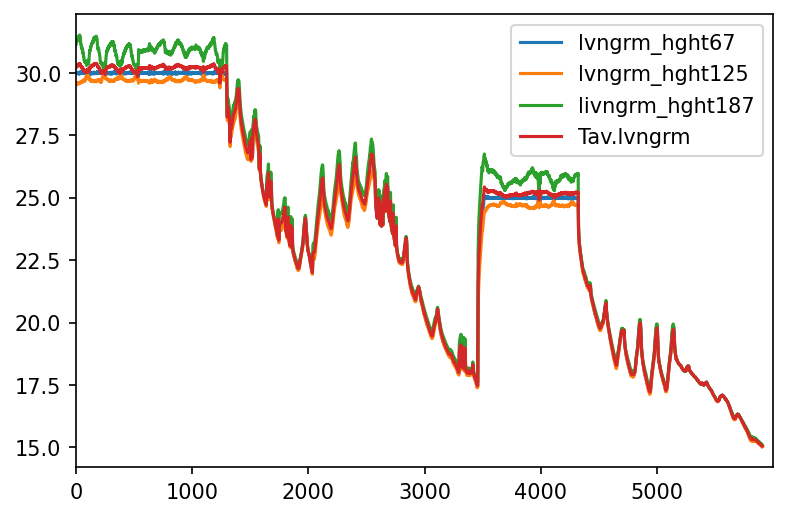

In [8]:
plt.figure(dpi=150)
plt.plot(Ti1,label='lvngrm_hght67')
plt.plot(Ti2,label='lvngrm_hght125')
plt.plot(Ti,label='livngrm_hght187')
plt.plot((Ti+Ti1+Ti2)/3,label='Tav.lvngrm')
#plt.plot(Ta,label='Outdr_temp')
plt.xlim(0,6000)
plt.xticks((np.arange(0,6000,1000)))
plt.legend()
#plt.title('The tempeartures recodrded by sensors at different hieghts in the same room')
plt.savefig('Exp_temp1.png')
plt.show()


In [1]:
df=pd.DataFrame([Ti,Ti1,Ti2,Tk,Td,Tc,Tb1]).transpose()
df['14']=df.mean(axis=1).round(decimals=2)
df.columns=['Lving_rm67','Lving_rm125','Lving_rm167','Ktchn','Drwy','Chldrn_rm','Bed_rm','Tmean']
plt.figure(dpi=150)
df.plot(y=['Drwy','Chldrn_rm','Bed_rm','Tmean'],figsize=(12,9),xlim=(0,6000))

NameError: name 'pd' is not defined

In [65]:
df

,Lving_rm67,Lving_rm125,Lving_rm167,Ktchn,Drwy,Chldrn_rm,Bed_rm,Tmean
0,31.134912,29.986008,29.531048,29.986731,30.012228,30.049305,30.000942,30.10
1,31.157990,30.000132,29.547962,29.994390,29.999079,30.057949,29.998449,30.11
2,31.184851,29.972891,29.546320,30.008350,29.985352,30.067911,30.000271,30.11
3,31.223591,29.984280,29.556202,29.993240,30.002310,30.070709,30.006247,30.12
4,31.257040,29.997700,29.553158,30.005650,30.023932,30.071751,30.000439,30.13
...,...,...,...,...,...,...,...,...
5900,15.117129,15.071091,15.052640,15.262601,15.604040,15.695460,16.120953,15.42
5901,15.116321,15.061041,15.049970,15.260260,15.601132,15.693260,16.118481,15.41
5902,15.117849,15.060422,15.031240,15.256880,15.598860,15.690831,16.113010,15.41
5903,15.108339,15.054210,15.033789,15.253000,15.593478,15.687030,16.107492,15.41


In [10]:
# We create categories for Hot, Cold and Normal temperatures
category=pd.cut(df.Tmean,bins=[0,19,26,31],labels=['Cold','Normal','Hot'])
#Insert the new category at 4th column
df.insert(8,'TEMP',category)
df

,Lving_rm67,Lving_rm125,Lving_rm167,Ktchn,Drwy,Chldrn_rm,Bed_rm,Tmean,TEMP
0,31.134912,29.986008,29.531048,29.986731,30.012228,30.049305,30.000942,30.10,Hot
1,31.157990,30.000132,29.547962,29.994390,29.999079,30.057949,29.998449,30.11,Hot
2,31.184851,29.972891,29.546320,30.008350,29.985352,30.067911,30.000271,30.11,Hot
3,31.223591,29.984280,29.556202,29.993240,30.002310,30.070709,30.006247,30.12,Hot
4,31.257040,29.997700,29.553158,30.005650,30.023932,30.071751,30.000439,30.13,Hot
...,...,...,...,...,...,...,...,...,...
5900,15.117129,15.071091,15.052640,15.262601,15.604040,15.695460,16.120953,15.42,Cold
5901,15.116321,15.061041,15.049970,15.260260,15.601132,15.693260,16.118481,15.41,Cold
5902,15.117849,15.060422,15.031240,15.256880,15.598860,15.690831,16.113010,15.41,Cold
5903,15.108339,15.054210,15.033789,15.253000,15.593478,15.687030,16.107492,15.41,Cold


In [11]:
#Reduce the number of sensors
results_all=[]
y=str(df.iloc[0,6])
# An array equal to the reducing number of digits after decimal
y=np.array(range(y[::-1].find('.'),2,-1))
for z in y:
    df.round(z)
    results_samp=[]
    #change the sampling rate
    for i in np.array(range(1000,df.shape[0],24*6*10)):
        df1=df.sample(i)
        results_sns=[]
        #Reduce the number of sensors
        for c in np.array(range(df1.shape[1]-1,1,-1)):
            X_train,X_test,y_train,y_test=train_test_split(df1.iloc[:,:c],df1.TEMP,test_size=0.4,random_state=101)
            #Apply fitting of the data
            logmodel=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=10000)
            logmodel.fit(X_train,y_train)
            #Predict the new values
            predictions=logmodel.predict(X_test)
            results_sns.append(metrics.balanced_accuracy_score(y_test,predictions))
        results_samp.append(results_sns)
    results_all.append(results_samp)

In [12]:
rs=pd.DataFrame(results_all)
rs

,0,1,2,3
0,"[0.9961685823754789, 0.9961685823754789, 1.0, ...","[0.9979550102249489, 0.9979550102249489, 0.997...","[0.9995822890559732, 0.9995822890559732, 0.997...","[0.9977904562032943, 0.9977904562032943, 0.999..."
1,"[0.9965811965811966, 0.9965811965811966, 0.996...","[1.0, 1.0, 1.0, 0.9977703245904935, 0.98170410...","[0.9979449239621866, 0.9979449239621866, 0.996...","[0.9994115916446015, 0.9994115916446015, 0.997..."
2,"[0.9983739837398374, 0.9983739837398374, 0.998...","[0.9907285014800887, 0.9907285014800887, 0.992...","[0.998998998998999, 0.998998998998999, 0.99959...","[0.9993844259772238, 0.9993844259772238, 0.999..."
3,"[1.0, 1.0, 1.0, 0.9969418960244649, 0.97527831...","[0.9993552546744037, 0.9993552546744037, 0.998...","[0.9962929962929964, 0.9962929962929964, 0.997...","[0.9972852660634407, 0.9972852660634407, 0.996..."


In [35]:
x=np.array(results_all)
index=pd.MultiIndex.from_product([range(s) for s in x.shape],names=['X','Y','Z'])
rs = pd.DataFrame({'x': x.flatten()}, index=index)['x']
rs = rs.unstack(level='X').swaplevel().sort_index()
rs.columns = ['Comp_1', 'Comp_2', 'Comp_3','Comp_4']
rs.index.names = ['# Sensors removed','Sampling Rate']
rs.index.set_levels([ 
                       ['0','1', '2','3','4','5','6'],['1000', '2440', '3880', '5320']], inplace=True)


/var/folders/0b/f9crck810477r2yg4k9mg_dc0000gp/T/ipykernel_13303/2464963032.py:7: FutureWarning: inplace is deprecated and will be removed in a future version.
  rs.index.set_levels([


In [37]:
rs

Comp_1    Comp_2    Comp_3    Comp_4
# Sensors removed Sampling Rate                                        
0                 1000           0.996169  0.996581  0.998374  1.000000
                  2440           0.997955  1.000000  0.990729  0.999355
                  3880           0.999582  0.997945  0.998999  0.996293
                  5320           0.997790  0.999412  0.999384  0.997285
1                 1000           0.996169  0.996581  0.998374  1.000000
                  2440           0.997955  1.000000  0.990729  0.999355
                  3880           0.999582  0.997945  0.998999  0.996293
                  5320           0.997790  0.999412  0.999384  0.997285
2                 1000           1.000000  0.996581  0.998374  1.000000
                  2440           0.997955  1.000000  0.992323  0.998711
                  3880           0.997661  0.996910  0.999596  0.997672
                  5320           0.999379  0.997348  0.999384  0.996868
3                 1000           1.000000  0.996581  1.000000  0.996942
                  2440           0.998637  0.997770  0.992323  0.998428
                  3880           0.997243  0.996910  0.998595  0.997243
                  5320           0.997790  0.996611  0.999077  0.995558
4                 1000           0.973896  0.977511  0.982079  0.975278
                  2440           0.991302  0.981704  0.987748  0.978836
                  3880           0.988556  0.984092  0.988942  0.985693
                  5320           0.990075  0.986886  0.991862  0.985208
5                 1000           0.954614  0.968857  0.964490  0.976089
                  2440           0.972705  0.969425  0.976506  0.964323
                  3880           0.974789  0.971700  0.983114  0.976409
                  5320           0.975743  0.976842  0.980330  0.975371
6                 1000           0.951247  0.963729  0.958302  0.966621
                  2440           0.968449  0.962701  0.970000  0.960617
                  3880           0.969700  0.968678  0.971737  0.973661
                  5320           0.970570  0.968623  0.975320  0.970267

<AxesSubplot:xlabel='# Sensors removed,Sampling Rate'>

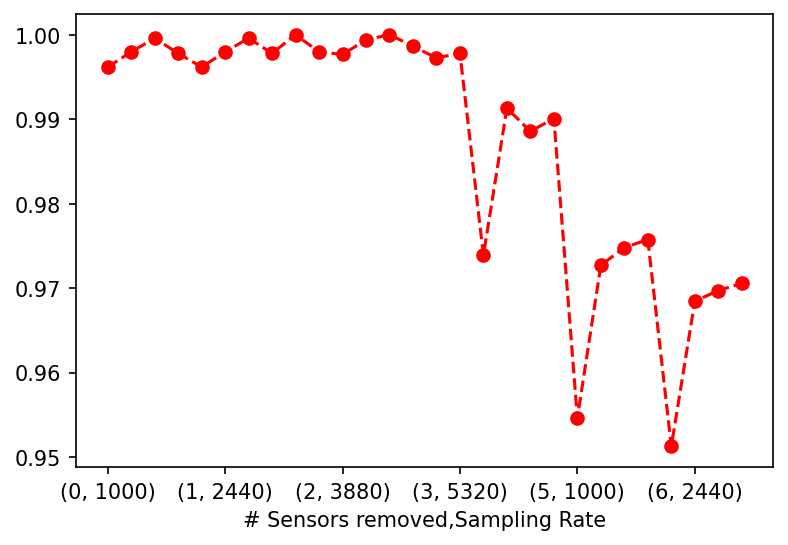

In [41]:
plt.figure(dpi=150)
rs.Comp_1.plot(linestyle='dashed',marker='o',color='red')